# Keras
https://keras.io/

Upgrade Keras and Tensorflow

In [17]:
!pip install -U keras tensorflow

Requirement already up-to-date: keras in /Users/bs/anaconda3/lib/python3.5/site-packages
    100% |████████████████████████████████| 71.6MB 12kB/s eta 0:00:012
    100% |████████████████████████████████| 6.2MB 136kB/s ta 0:00:011
    100% |████████████████████████████████| 13.9MB 64kB/s eta 0:00:01
    100% |████████████████████████████████| 276kB 1.2MB/s ta 0:00:01
Requirement already up-to-date: keras-applications>=1.0.6 in /Users/bs/anaconda3/lib/python3.5/site-packages (from keras)
Requirement already up-to-date: keras-preprocessing>=1.0.5 in /Users/bs/anaconda3/lib/python3.5/site-packages (from keras)
    100% |████████████████████████████████| 27.6MB 32kB/s eta 0:00:01
    100% |████████████████████████████████| 368kB 882kB/s ta 0:00:01
    100% |████████████████████████████████| 3.2MB 282kB/s eta 0:00:01
    100% |████████████████████████████████| 3.8MB 215kB/s ta 0:00:011
    100% |████████████████████████████████| 102kB 2.0MB/s a 0:00:01
    100% |█████████████████████████████

  Found existing installation: scipy 0.19.0
    Uninstalling scipy-0.19.0:
      Successfully uninstalled scipy-0.19.0
Traceback (most recent call last):
  File "/Users/bs/anaconda3/bin/pip", line 6, in <module>
    sys.exit(pip.main())
  File "/Users/bs/anaconda3/lib/python3.5/site-packages/pip/__init__.py", line 249, in main
    return command.main(cmd_args)
  File "/Users/bs/anaconda3/lib/python3.5/site-packages/pip/basecommand.py", line 252, in main
    pip_version_check(session)
  File "/Users/bs/anaconda3/lib/python3.5/site-packages/pip/utils/outdated.py", line 102, in pip_version_check
    installed_version = get_installed_version("pip")
  File "/Users/bs/anaconda3/lib/python3.5/site-packages/pip/utils/__init__.py", line 838, in get_installed_version
    working_set = pkg_resources.WorkingSet()
  File "/Users/bs/anaconda3/lib/python3.5/site-packages/pip/_vendor/pkg_resources/__init__.py", line 644, in __init__
    self.add_entry(entry)
  File "/Users/bs/anaconda3/lib/python3.5/s

Check the versions of both Keras and Tensorflow

In [1]:
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

1.13.1
2.2.4


## Build a Simple NN 
Build a NN consisting of a linear stack of layers using the __Sequential__ model to get somewhat familiar with Keras

In [2]:
from keras.models import Sequential

model = Sequential()

Add a simple input and output layer
* input can have any activation function such as a Rectified Linear Unit (relu)
* output layer needs to have an activation function of Softmax - this will output an array of values that all add up to 1, representing the likelihood of each index (0-9) being the number seen in the image

Note, to see Keras' activation functions you can type "from keras.activations import " then hit tab to see a list of functions.  I do this in top of the following block as an example.  You can in turn call that newly imported function or simply call the name (without having previously imported it).

In [12]:
from keras.layers import Dense

model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))

If you import any particular function, you can see what the function description is by calling it and hitting "tab+tab"

In [6]:
from keras.activations import softmax

print(softmax.__doc__)

Compile the model using any desired loss fucntion, optimizer, and metrics

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Once again you can check the keras loss functions, and optimizers similar to the activations

As for metrics, typically you will use `metrics=['accuracy']`.
        To specify different metrics for different outputs of a
        multi-output model, you could also pass a dictionary,
        such as `metrics={'output_a': 'accuracy'}`.

In [14]:
from keras.losses import categorical_crossentropy
from keras.optimizers import sgd

print(categorical_crossentropy.__doc__)
print()
print(sgd.__doc__)

None

Stochastic gradient descent optimizer.

    Includes support for momentum,
    learning rate decay, and Nesterov momentum.

    # Arguments
        lr: float >= 0. Learning rate.
        momentum: float >= 0. Parameter that accelerates SGD
            in the relevant direction and dampens oscillations.
        decay: float >= 0. Learning rate decay over each update.
        nesterov: boolean. Whether to apply Nesterov momentum.
    


What are the current layers of the network?

In [15]:
model.layers

Alternative method of compiling your model, where you can specify optimizer parameters, etc.

In [16]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True))

## MNIST

Let's get some data

In [46]:
from keras.datasets import mnist

# get the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

What does the shape of the data look like?

In [47]:
x_train.shape

(60000, 28, 28)

What does one of the images look like?

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

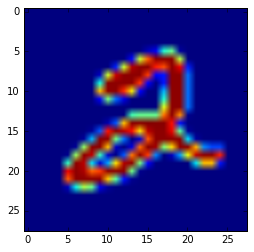

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt

n=5

img_shape = x_train.shape[1:-1]
plt.imshow(x_train[n].reshape(img_shape))
y_train[n]



What does the distribution of the data look like?

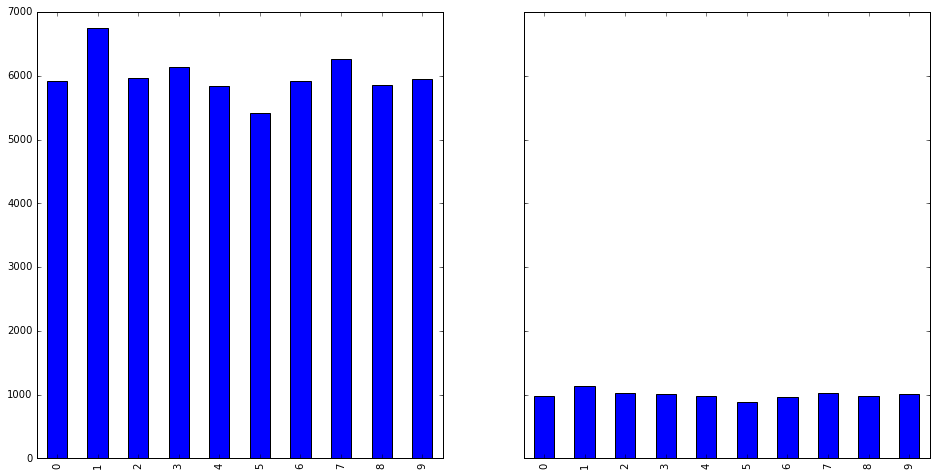

In [48]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16,8))

# get the labels
dfTrain = pd.DataFrame(y_train, columns=['LABEL'])
dfTest = pd.DataFrame(y_test, columns=['LABEL'])

# plot the values
dfTrain.LABEL.value_counts().sort_index().plot.bar(ax=ax[0])
dfTest.LABEL.value_counts().sort_index().plot.bar( ax=ax[1])

As you can see there is a lot more data used in training then in testing, but at initial glance the raios across the values appear to be similar enough

### Build a Classifier Model

Initial approach, simple no hidden layers

In [51]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import K

# get the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the data to what Keras expects
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2]))
    
# one-hot enocde the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

What does the shape of the data look like now?

In [52]:
x_train.shape

(60000, 784)

Grab the NN input (per record) shape

In [54]:
input_shape = x_train.shape[1:]
input_shape

(784,)

If you want to have flexibility an alternative way of defining the architecture of your model is to chain the layers together in a manner where each subsequent layer references the previous layer.

i.e. 
```
Dense(units=..., activation=....)(inputs)
```
I do this in this section.  If you prefer to use the pre-styled Sequential model, then define model similarly to the previous section above, and wrapp each of the layers in model.add(....)

i.e. 
```
model = Sequential()
model.add(Dense(..., input_dim=...))
```

In [55]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from keras.backend import clear_session

clear_session()

inputs = Input(shape=input_shape)
x = Dense(units=32, activation=keras.activations.relu)(inputs)
x = Dense(units=10, activation='softmax')(x)

model = Model(inputs, x)

Compile just as in the previous section

In [56]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Fit or train your model
* tweek these parameters to see if theres any improvement.
* Add layers and try again

In [95]:
model.fit(x_train, y_train, batch_size=32, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 2s 30us/step - loss: 14.4708 - acc: 0.1022
Epoch 2/5
60000/60000 [==============================] - 2s 28us/step - loss: 14.4711 - acc: 0.1022
Epoch 3/5
60000/60000 [==============================] - 2s 30us/step - loss: 14.4711 - acc: 0.1022
Epoch 4/5
60000/60000 [==============================] - 2s 29us/step - loss: 14.4711 - acc: 0.1022
Epoch 5/5
60000/60000 [==============================] - 2s 30us/step - loss: 14.4711 - acc: 0.1022


Try building a ConvNet version and see how it compares to the Dense network
* which is faster to train and test?
* which is more accurate?
* etc....

preprocess the data

In [139]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import K

# get the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the data to what Keras expects
if K.image_data_format() == 'channels_first':
    # (imgCount, channelCount, imgheight, imgwidth)
    x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1], x_train.shape[2]))
    x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1], x_test.shape[2]))
else:
    # (imgCount, imgheight, imgwidth, channelCount)
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
    
# one-hot enocde the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

What is the shape of the image now?

In [140]:
x_train.shape

(60000, 28, 28, 1)

What is the shape of the labels

In [168]:
y_train.shape

(60000, 10)

What is the model input shape?

In [141]:
input_shape = x_train.shape[1:]
input_shape

(28, 28, 1)

Build the model

In [180]:
from keras.models import Model
from keras.layers import Input,Dense,Conv2D,Flatten
from keras.backend import clear_session

clear_session()

inputs = Input(input_shape)
x = Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='sigmoid')(inputs)
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs, x)

What is the shape of the output?
* None at index 0 of the shape tuple is due to it not knowing how many output rows it will have until the model receives the data

In [181]:
model.output_shape

(None, 10)

Compile, same as before

In [189]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Fit/Train the model

In [190]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s 167us/step - loss: 4.7379 - acc: 0.7004
Epoch 2/5
60000/60000 [==============================] - 10s 164us/step - loss: 4.7356 - acc: 0.7010
Epoch 3/5
60000/60000 [==============================] - 10s 166us/step - loss: 4.7330 - acc: 0.7019
Epoch 4/5
60000/60000 [==============================] - 10s 170us/step - loss: 4.7311 - acc: 0.7025
Epoch 5/5
60000/60000 [==============================] - 10s 173us/step - loss: 4.7293 - acc: 0.7033


Take a look at how the training went 

,acc,loss
0,0.700367,4.737924
1,0.701017,4.735626
2,0.701867,4.732973
3,0.702533,4.731084
4,0.703267,4.729329


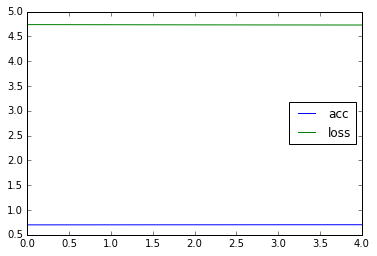

In [192]:
import pandas as pd

dfHist = pd.DataFrame(hist.history)
dfHist.plot.line()
dfHist

Deeper NN - Add another layer

In [169]:
from keras.models import Model
from keras.layers import Input,Dense,Conv2D,Flatten
from keras.backend import clear_session

clear_session()

inputs = Input(input_shape)
x = Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='sigmoid')(inputs)
x = Conv2D(16, kernel_size=(3,3), strides=(1,1), activation='sigmoid')(x)
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs, x)

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [170]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 32s 527us/step - loss: 0.5149 - acc: 0.8460
Epoch 2/5
60000/60000 [==============================] - 34s 561us/step - loss: 0.2248 - acc: 0.9349
Epoch 3/5
60000/60000 [==============================] - 34s 571us/step - loss: 0.1555 - acc: 0.9559
Epoch 4/5
60000/60000 [==============================] - 34s 572us/step - loss: 0.1228 - acc: 0.9645
Epoch 5/5
60000/60000 [==============================] - 33s 558us/step - loss: 0.1047 - acc: 0.9698


How did the training go on this one?

,acc,loss
0,0.846000,0.514888
1,0.934867,0.224786
2,0.955933,0.155466
3,0.964550,0.122788
4,0.969850,0.104746


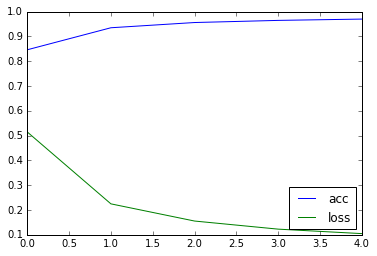

In [179]:
import pandas as pd

dfHist = pd.DataFrame(hist.history)
dfHist.plot.line()
dfHist